# Band Math w. Rasterio

----------------

```{admonition} Learning Objectives
* Conduct mathematical operations on raster bands with rasterio
* Understand the requirements for successful mathematical operations
```
```{admonition} Review
* [Reproject Rasters w. Rasterio and Geowombat](e_raster_reproject.md)
* [Resampling Rasters w. Rasterio and Geowombat](e_raster_resample.md)
```

----------------

Band math is useful when you want to perform a mathematical operation to each pixel value in a raster. You might find band math helpful for calculating NDVI or multiplying all values by a constant.

## Setup

To begin, we will import our modules (click the + below to show code cell).

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from rasterio.transform import Affine

## Band Math with rasterio with multiple images

`Rasterio` makes band math relatively straightforward since the rasters are essentially read in as numpy arrays, so you can perform math on the raster arrays just like any numpy array.

```{attention}
Mathematical operations on rasters using `rasterio` are not spatially aware. Any mathematical operation with multiple rasters will work even if the rasters are not representing the same geographical extent. Consequently, you need to ensure that the cell size and extent represented in all rasters are the same. In other words, if you are using two rasters in a mathematical operation, they must have the same shape (same number of rows and columns).
```

In this example we will write two raster files to the disk: `math_raster_a.tif` and `math_raster_b.tif`. We will then read then back in and do math on them. Let's generate some rasters (click the + below to show code cell).

In [2]:
# Generate mesh grid for rasters
x = np.linspace(-90, 90, 6)
y = np.linspace(90, -90, 6)
X, Y = np.meshgrid(x, y)

# Generate values for mesh grid
Z1 = np.abs(((X - 10) ** 2 + (Y - 10) ** 2) / 1 ** 2)
Z2 = np.abs(((X + 10) ** 2 + (Y + 10) ** 2) / 2.5 ** 2)
Z3 = np.abs(((X + 3) + (Y - 8) ** 2) / 3 ** 2)

# Generate raster values for two rasters
Z_a = (Z1 - Z2)
Z_b = (Z2 - Z3)

# Set transform
xres = (x[-1] - x[0]) / len(x)
yres = (y[-1] - y[0]) / len(y)
transform = Affine.translation(x[0] - xres / 2, y[0] - yres / 2) * Affine.scale(xres, yres)

# Save first raster
with rasterio.open(
        "../temp/math_raster_a.tif",
        mode="w",
        driver="GTiff",
        height=Z_a.shape[0],
        width=Z_a.shape[1],
        count=1,
        dtype=Z_a.dtype,
        crs="+proj=latlong",
        transform=transform,
) as new_dataset:
        new_dataset.write(Z_a, 1)

# Save second raster
with rasterio.open(
        "../temp/math_raster_b.tif",
        mode="w",
        driver="GTiff",
        height=Z_b.shape[0],
        width=Z_b.shape[1],
        count=1,
        dtype=Z_b.dtype,
        crs="+proj=latlong",
        transform=transform,
) as new_dataset:
        new_dataset.write(Z_b, 1)

Next, we'll view the raster values.

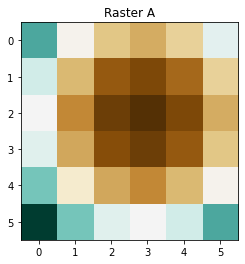

[[13776.    8586.24  5573.76  4738.56  6080.64  9600.  ]
 [10256.64  5066.88  2054.4   1219.2   2561.28  6080.64]
 [ 8914.56  3724.8    712.32  -122.88  1219.2   4738.56]
 [ 9749.76  4560.    1547.52   712.32  2054.4   5573.76]
 [12762.24  7572.48  4560.    3724.8   5066.88  8586.24]
 [17952.   12762.24  9749.76  8914.56 10256.64 13776.  ]]


In [3]:
# Open raster and plot
raster_a = rasterio.open("../temp/math_raster_a.tif").read(1)
plt.imshow(raster_a, cmap = "BrBG")
plt.title("Raster A")
plt.show()

# View raster values
print(raster_a)

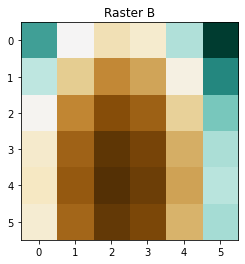

[[1886.55555556 1168.31555556  864.79555556  975.99555556 1501.91555556
  2442.55555556]
 [1453.91555556  735.67555556  432.15555556  543.35555556 1069.27555556
  2009.91555556]
 [1147.99555556  429.75555556  126.23555556  237.43555556  763.35555556
  1703.99555556]
 [ 968.79555556  250.55555556  -52.96444444   58.23555556  584.15555556
  1524.79555556]
 [ 916.31555556  198.07555556 -105.44444444    5.75555556  531.67555556
  1472.31555556]
 [ 990.55555556  272.31555556  -31.20444444   79.99555556  605.91555556
  1546.55555556]]


In [4]:
# Open raster and plot
raster_b = rasterio.open("../temp/math_raster_b.tif").read(1)
plt.imshow(raster_b, cmap = "BrBG")
plt.title("Raster B")
plt.show()

# View raster values
print(raster_b)

### Example band math operations

We can get the difference between the two rasters.

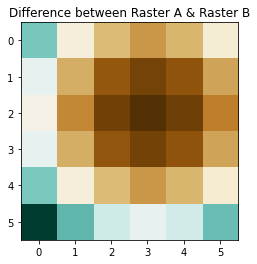

Raster values:
 [[11889.44444444  7417.92444444  4708.96444444  3762.56444444
   4578.72444444  7157.44444444]
 [ 8802.72444444  4331.20444444  1622.24444444   675.84444444
   1492.00444444  4070.72444444]
 [ 7766.56444444  3295.04444444   586.08444444  -360.31555556
    455.84444444  3034.56444444]
 [ 8780.96444444  4309.44444444  1600.48444444   654.08444444
   1470.24444444  4048.96444444]
 [11845.92444444  7374.40444444  4665.44444444  3719.04444444
   4535.20444444  7113.92444444]
 [16961.44444444 12489.92444444  9780.96444444  8834.56444444
   9650.72444444 12229.44444444]]


In [5]:
# Get difference
difference_a_b = raster_a - raster_b

# Plot raster
plt.imshow(difference_a_b, cmap = "BrBG")
plt.title("Difference between Raster A & Raster B")
plt.show()

# Show raster values
print("Raster values:\n", difference_a_b)

We can multiply a raster by a constant.

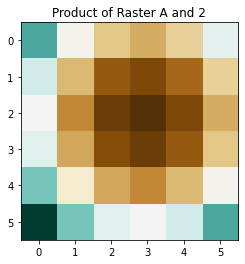

Raster values:
 [[27552.   17172.48 11147.52  9477.12 12161.28 19200.  ]
 [20513.28 10133.76  4108.8   2438.4   5122.56 12161.28]
 [17829.12  7449.6   1424.64  -245.76  2438.4   9477.12]
 [19499.52  9120.    3095.04  1424.64  4108.8  11147.52]
 [25524.48 15144.96  9120.    7449.6  10133.76 17172.48]
 [35904.   25524.48 19499.52 17829.12 20513.28 27552.  ]]


In [6]:
# Get product
product_a = raster_a * 2

# Plot raster
plt.imshow(product_a, cmap = "BrBG")
plt.title("Product of Raster A and 2")
plt.show()

# Show raster values
print("Raster values:\n", product_a)

### Band math with NoData values

If a pixel has a value of `nan`, `None`, or `NoData` value, those pixels will automatically be ignored in any band math. The output raster will maintain the `nan`, `None`, or `NoData` value at that pixel location.

Not all rasters, however, use those values to signify that a pixel has no value. Some rasters might use 0 or another number to indicate no value. In that case, we have to explicitly mark that pixel to be skipped.

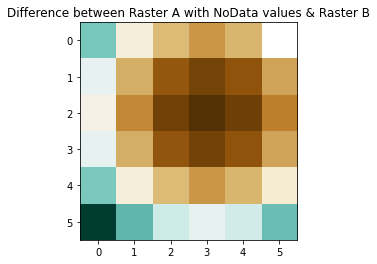

Raster values:
 [[11889.444444444445 7417.924444444445 4708.964444444445
  3762.564444444444 4578.724444444444 --]
 [8802.724444444444 4331.204444444445 1622.2444444444445
  675.8444444444445 1492.0044444444443 4070.7244444444436]
 [7766.564444444444 3295.0444444444447 586.0844444444443
  -360.31555555555553 455.84444444444455 3034.564444444444]
 [8780.964444444444 4309.444444444444 1600.4844444444443
  654.0844444444443 1470.2444444444445 4048.964444444445]
 [11845.924444444445 7374.404444444444 4665.444444444444
  3719.0444444444447 4535.204444444445 7113.924444444445]
 [16961.444444444445 12489.924444444445 9780.964444444444
  8834.564444444444 9650.724444444444 12229.444444444445]]


In [7]:
# Create a copy of first raster
raster_0 = raster_a.copy()

# Set a pixel value to 0 as an example, which will signify NoData
# (top right pixel)
raster_0[0, 5] = 0

# Mask out any NoData (0) values
raster_0_masked = np.ma.masked_array(raster_0, mask = (raster_0 == 0))

# Get difference between masked raster and second raster
difference_0_b = raster_0_masked - raster_b

# Plot raster
plt.imshow(difference_0_b, cmap = "BrBG")
plt.title("Difference between Raster A with NoData values & Raster B")
plt.show()

# Show raster values
print("Raster values:\n", difference_0_b)

### Example: Calculating NDVI

In the example below, we will read in a clipped Landsat 8, Collection 2 Level-2 image and use the band math concepts to calculate the normalized difference vegetation index (NDVI) for the image. As you may recall, NDVI is a spectral approach used to assess vegetation. The formula for NDVI is:

$$
  NDVI = \frac{NIR - Red}{NIR + Red}
$$

where `NIR` is the near-infrared band and `Red` is the red band.

High NDVI values (towards 1) reflect a higher density of green vegetation, and low values (towards -1) reflect a lower density.

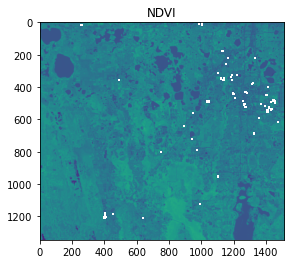

Raster values:
 [[0.1045768  0.08932138 0.09787864 ... 0.21016596 0.27657979 0.24717701]
 [0.07188325 0.1010677  0.1213656  ... 0.22981464 0.24469611 0.23835025]
 [0.03591049 0.14069341 0.17257186 ... 0.22467695 0.2150974  0.21510794]
 ...
 [0.27475696 0.24538079 0.24003341 ... 0.2692435  0.26424982 0.2754381 ]
 [0.28198954 0.26983464 0.25958875 ... 0.26693343 0.2685162  0.25831458]
 [0.27442722 0.28693113 0.2514506  ... 0.27998016 0.28904986 0.2745722 ]]


In [8]:
# Open raster (Landsat 8, Collection 2 Level-2)
# Band 1 - Blue, Band 2 - Green, Band 3 - Red, Band 4 - Near Infrared
# Source: https://www.usgs.gov/centers/eros/science/usgs-eros-archive-landsat-archives-landsat-8-9-olitirs-collection-2-level-2
with rasterio.open("../data/LC08_L2SP_016040_20210317_20210328_02_T1_clip.tif", mode = "r", nodata = 0) as src:

    # Get red band
    band_red = src.read(3)

    # Get NIR band
    band_nir = src.read(4)

    # Allow division by zero
    np.seterr(divide = "ignore", invalid = "ignore")

    # Calculate NDVI
    ndvi = (band_nir.astype(float) - band_red.astype(float)) / (band_nir + band_red)

# Set pixels whose values are outside the NDVI range (-1, 1) to NaN
# Likely due to errors in the Landsat imagery
ndvi[ndvi > 1] = np.nan
ndvi[ndvi < -1] = np.nan

# Plot raster
plt.imshow(ndvi)
plt.title("NDVI")
plt.show()

# Show raster values
print("Raster values:\n", ndvi)

## Band Math with GeoWombat

For band math with `GeoWombat`, see the chapter on [Band Math & Vegetation Indices](f_rs_band_math.md).